In [1]:
import pandas
import os
import matplotlib.pyplot as plt
import numpy
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

In [2]:
covid = pandas.read_csv(os.environ['DATADIR'] + '/covid_data/covid_19_data.csv')
covid['ObservationDate']= pandas.to_datetime(covid['ObservationDate']) 
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


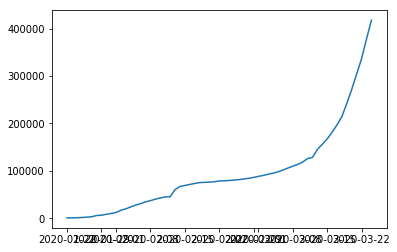

In [3]:
plt.plot(covid.groupby(['ObservationDate']).sum()['Confirmed'])

In [4]:
line = LinearRegression()
x = covid['ObservationDate'].unique().reshape(-1, 1)
y = covid.groupby(['ObservationDate']).sum()['Confirmed']
line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

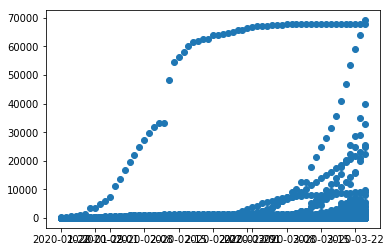

In [5]:
plt.plot_date(covid['ObservationDate'],covid['Confirmed'])

In [6]:
covid[covid['Confirmed']==max(covid['Confirmed'])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
8285,8286,2020-03-24,NaN,Italy,2020-03-24 23:41:50,69176.0,6820.0,8326.0


In [7]:
covid[covid['ObservationDate'] == covid['ObservationDate'].max() + datetime.timedelta(days=0)]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
8210,8211,2020-03-24,NaN,Afghanistan,2020-03-24 23:41:50,74.0,1.0,1.0
8211,8212,2020-03-24,NaN,Albania,2020-03-24 23:41:50,123.0,5.0,10.0
8212,8213,2020-03-24,NaN,Algeria,2020-03-24 23:41:50,264.0,19.0,24.0
8213,8214,2020-03-24,NaN,Andorra,2020-03-24 23:41:50,164.0,1.0,1.0
8214,8215,2020-03-24,NaN,Angola,2020-03-24 23:41:50,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8504,8505,2020-03-24,Wuhan Evacuee,US,2020-03-24 23:41:50,4.0,0.0,0.0
8505,8506,2020-03-24,Wyoming,US,2020-03-24 23:41:50,29.0,0.0,0.0
8506,8507,2020-03-24,Xinjiang,Mainland China,2020-03-24 23:41:50,76.0,3.0,73.0
8507,8508,2020-03-24,Yunnan,Mainland China,2020-03-24 23:41:50,176.0,2.0,172.0


In [8]:
confirmed = covid[covid['Confirmed']!=0]
confirmed.groupby('Country/Region').apply(lambda x: x["Confirmed"] / x["Confirmed"].max())

Country/Region                      
 Azerbaijan                     2663    1.000000
('St. Martin',)                 4674    1.000000
Afghanistan                     2258    0.013514
                                2351    0.013514
                                2452    0.013514
                                          ...   
Zimbabwe                        7567    1.000000
                                7778    1.000000
                                8076    1.000000
                                8374    1.000000
occupied Palestinian territory  4592    1.000000
Name: Confirmed, Length: 8314, dtype: float64

In [9]:
x = []
y = []
groups = confirmed.groupby('Country/Region')
for group in groups:
    x.extend((group[1]['ObservationDate'] - group[1]['ObservationDate'].min()).dt.days)
    y.extend(group[1]['Confirmed'] )
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

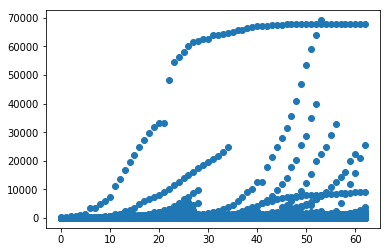

In [10]:
plt.scatter(x,y)
plt.show()

In [11]:
lin = LinearRegression()
lin.fit(x,y)
lin.score(x,y) #R^2 value, expected low because nonlinear

0.009081492567587168

In [64]:
topcases = list(covid[covid['ObservationDate'] == covid['ObservationDate'].max()].groupby(['Country/Region']).sum().sort_values('Confirmed',ascending=False).head(10).index)
top = covid[covid['Country/Region'].isin(topcases)].groupby(['ObservationDate','Country/Region']).sum().sort_values(['ObservationDate','Confirmed'],ascending = False)
top.head()


SNo  Confirmed  Deaths  Recovered
ObservationDate Country/Region                                      
2020-03-24      Mainland China  261723    81180.0  3277.0    73169.0
                Italy             8286    69176.0  6820.0     8326.0
                US              506706    53740.0   706.0      348.0
                Spain             8351    39885.0  2808.0     3794.0
                Germany           8268    32986.0   157.0     3243.0

In [70]:
top.index

MultiIndex([('2020-03-24', 'Mainland China'),
            ('2020-03-24',          'Italy'),
            ('2020-03-24',             'US'),
            ('2020-03-24',          'Spain'),
            ('2020-03-24',        'Germany'),
            ('2020-03-24',           'Iran'),
            ('2020-03-24',         'France'),
            ('2020-03-24',    'Switzerland'),
            ('2020-03-24',    'South Korea'),
            ('2020-03-24',             'UK'),
            ...
            ('2020-01-24', 'Mainland China'),
            ('2020-01-24',         'France'),
            ('2020-01-24',    'South Korea'),
            ('2020-01-24',             'US'),
            ('2020-01-23', 'Mainland China'),
            ('2020-01-23',    'South Korea'),
            ('2020-01-23',             'US'),
            ('2020-01-22', 'Mainland China'),
            ('2020-01-22',    'South Korea'),
            ('2020-01-22',             'US')],
           names=['ObservationDate', 'Country/Region'], length=